In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from utils import *

In [70]:
data = pd.read_csv('./Data/dataset_cleaned.csv')

In [71]:
X = data[['MONATSZAHL','AUSPRAEGUNG','JAHR','MONAT']]
y = data['WERT']

In [72]:
X.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT
0,Verkehrsunfälle,Verletzte und Getötete,2000,12
1,Verkehrsunfälle,mit Personenschäden,2000,3
2,Verkehrsunfälle,mit Personenschäden,2000,2
3,Verkehrsunfälle,mit Personenschäden,2000,1
4,Verkehrsunfälle,insgesamt,2000,12


In [76]:
X['MONATSZAHL']=X['MONATSZAHL'].apply(lambda x: trans_MONATSZAHL(x))
X['AUSPRAEGUNG']=X['AUSPRAEGUNG'].apply(lambda x: trans_AUSPRAEGUNG(x))
X['JAHR']=X['JAHR'].apply(lambda x: trans_JAHR(x))
X['MONAT']=X['MONAT'].apply(lambda x: trans_MONAT(x))

<ipython-input-76-c767820809a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MONATSZAHL']=X['MONATSZAHL'].apply(lambda x: trans_MONATSZAHL(x))
<ipython-input-76-c767820809a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AUSPRAEGUNG']=X['AUSPRAEGUNG'].apply(lambda x: trans_AUSPRAEGUNG(x))
<ipython-input-76-c767820809a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [77]:
X

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT
0,2,1,2000,12
1,2,2,2000,3
2,2,2,2000,2
3,2,2,2000,1
4,2,0,2000,12
...,...,...,...,...
1759,2,1,2020,7
1760,2,1,2020,8
1761,2,1,2020,9
1762,2,1,2020,10


In [48]:
X = pd.get_dummies(data=X, drop_first=True)

In [49]:
X

,JAHR,MONAT,MONATSZAHL_Fluchtunfälle,MONATSZAHL_Verkehrsunfälle,AUSPRAEGUNG_insgesamt,AUSPRAEGUNG_mit Personenschäden
0,2000,12,0,1,0,0
1,2000,3,0,1,0,1
2,2000,2,0,1,0,1
3,2000,1,0,1,0,1
4,2000,12,0,1,1,0
...,...,...,...,...,...,...
1759,2020,7,0,1,0,0
1760,2020,8,0,1,0,0
1761,2020,9,0,1,0,0
1762,2020,10,0,1,0,0


## linear regression

/opt/anaconda3/envs/ldsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WERT'>

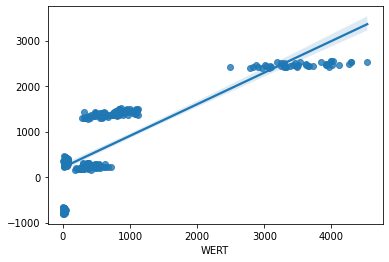

In [78]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 40)

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
predictions = linear_reg.predict(X_test)
sns.regplot(y_test,predictions)

In [79]:
linear_reg.score(X_test, y_test)

0.6722916968270071

/opt/anaconda3/envs/ldsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WERT'>

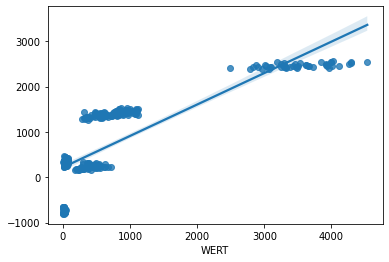

In [80]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
sns.regplot(y_test,predictions)

/opt/anaconda3/envs/ldsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WERT'>

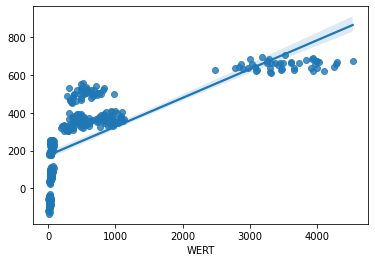

In [81]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, random_state=0)
reg = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=0, tol=1e-5))
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
sns.regplot(y_test,predictions)

In [82]:
reg.score(X_test, y_test)

0.10573228239463073

/opt/anaconda3/envs/ldsi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WERT'>

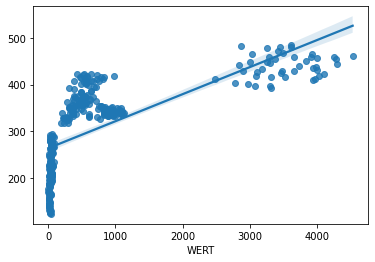

In [83]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
sns.regplot(y_test,predictions)

In [84]:
reg.score(X_test, y_test)

-0.034484856939484665

## Save best model

In [85]:
model_path = './Model/linear_reg.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(linear_reg, file)

## Load and predict

In [86]:
with open(model_path, 'rb') as file:
    model = pickle.load(file)

In [96]:
test = pd.DataFrame({'MONATSZAHL':['Fluchtunfälle'],'AUSPRAEGUNG':['insgesamt'],'JAHR':['2022'],'MONAT':['11']})

In [97]:
test

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT
0,Fluchtunfälle,insgesamt,2022,11


In [98]:
def transform(X):
    X['MONATSZAHL']=X['MONATSZAHL'].apply(lambda x: trans_MONATSZAHL(x))
    X['AUSPRAEGUNG']=X['AUSPRAEGUNG'].apply(lambda x: trans_AUSPRAEGUNG(x))
    X['JAHR']=X['JAHR'].apply(lambda x: trans_JAHR(x))
    X['MONAT']=X['MONAT'].apply(lambda x: trans_MONAT(x))
    return X

In [99]:
test = transform(test)

In [101]:
print(model.predict(test))

[1512.00356233]
